In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv("data/std.csv")

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


In [12]:
df["total_score"]=df["math score"]+df['reading score']+df['writing score']


In [29]:
X=df.drop("math score",axis=1)
y=df['math score']

In [30]:
# create colunms Transforms
num_future=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

obj=ColumnTransformer(transformers=[
    ("nem_features",StandardScaler(),num_future),
    ("cat_feature",OneHotEncoder(),cat_features)
])

In [31]:
x=obj.fit_transform(X)
x.shape

(1000, 20)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [34]:
# model performance 
def model_performance(y_true,y_predict):
    mse=mean_squared_error(y_true,y_predict)
    rmse=np.sqrt(mean_squared_error(y_true,y_predict))
    r_score=r2_score(y_true,y_predict)
    return mse,rmse,r_score


In [35]:
#model in dic
model={
    "LogisticRegression":LogisticRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "SVM":SVR(),
    "RandomForestRegressor":RandomForestRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor()
}

In [41]:
# Train model and get accurecy

mode_name=[]
model_score=[]

for i in range(len(list(model))):
    processes=list(model.values())[i]
    processes.fit(x_train,y_train)
    y_pred=processes.predict(x_test)
    
    
    mse_model,rmse_model,r_score_model=model_performance(y_test,y_pred)
    
    print(list(model.keys())[i])
    mode_name.append(list(model.keys())[i])
    print("mean_squared_error:",mse_model)
    print("root_mean_squared_error:",rmse_model)
    print("r2_score:",r_score_model)
    
    print("*"*30)
    print('\n')
    
    model_score.append(r_score_model)

LogisticRegression
mean_squared_error: 86.6225
root_mean_squared_error: 9.307120929696788
r2_score: 0.6265140604705874
******************************


Lasso
mean_squared_error: 23.467805670111908
root_mean_squared_error: 4.844358127772131
r2_score: 0.8988150255488421
******************************


Ridge
mean_squared_error: 2.983335467880254
root_mean_squared_error: 1.72723347231353
r2_score: 0.9871369003416817
******************************


SVM
mean_squared_error: 82.89588898690792
root_mean_squared_error: 9.104717952078907
r2_score: 0.6425819044543717
******************************


RandomForestRegressor
mean_squared_error: 18.93897975
root_mean_squared_error: 4.351893811893852
r2_score: 0.9183417397828824
******************************


KNeighborsRegressor
mean_squared_error: 43.53305
root_mean_squared_error: 6.597958017447519
r2_score: 0.8123007061695183
******************************


DecisionTreeRegressor
mean_squared_error: 38.345
root_mean_squared_error: 6.19233397032169

In [42]:
#show the scorewise

score=pd.DataFrame(list(zip(mode_name,model_score)),columns=["model_name","Score"]).sort_values(by=["Score"],ascending=False)
score

,model_name,Score
2,Ridge,0.987137
4,RandomForestRegressor,0.918342
1,Lasso,0.898815
6,DecisionTreeRegressor,0.834670
5,KNeighborsRegressor,0.812301
3,SVM,0.642582
0,LogisticRegression,0.626514


In [44]:
#the beat model is Lasso
model2=Lasso()
model2.fit(x_train,y_train)
fin_score=model2.predict(x_test)

In [47]:
r2_score(y_test,fin_score)*100

89.88150255488421

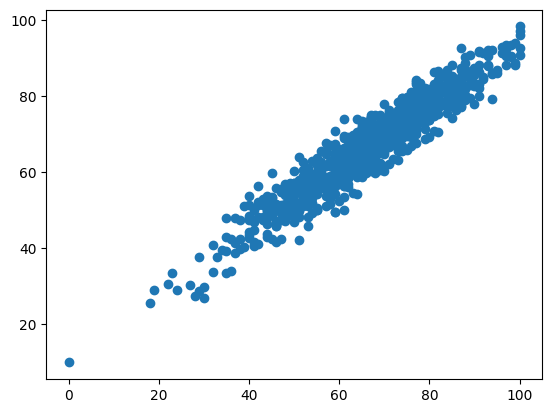

In [50]:
#plot the data

plt.scatter(y_test,fin_score)
plt.show()

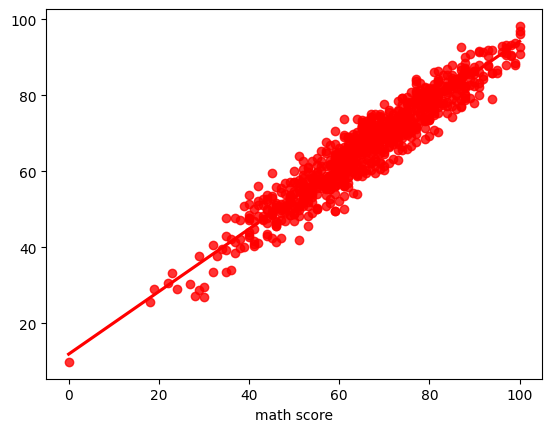

In [52]:
sns.regplot(x=y_test,y=fin_score,ci=None,color="r")
plt.show()

In [53]:
diff=pd.DataFrame({"actual":y_test,"predited":fin_score,"difference":y_test-fin_score})

In [56]:
diff.sort_index().head(10)

,actual,predited,difference
0,72,68.847650,3.152350
2,90,87.390893,2.609107
3,47,51.293597,-4.293597
5,71,73.174407,-2.174407
6,88,86.463731,1.536269
7,40,43.258192,-3.258192
8,64,65.819138,-1.819138
9,38,47.213867,-9.213867
10,58,56.238462,1.761538
11,40,47.275895,-7.275895
